In [1]:
import whisper
import warnings as w
w.filterwarnings('ignore')

In [2]:
# from previous calculations

wer_base = 28.57142857142857
cer_base = 6.214689265536723
mer_base = 27.586206896551722

wer_medium = 23.214285714285715
cer_medium = 5.790960451977401
mer_medium = 22.608695652173914

wer_large = 21.428571428571427
cer_large = 4.661016949152542
mer_large = 20.869565217391305

#### Accuracy 

In [27]:
# base
print('\n Base')
wer_accuracy = 100 - wer_base
cer_accuracy = 100 - cer_base
mer_accuracy = 100 - mer_base
accuracy_base = wer_accuracy
print("WER Accuracy (%):", wer_accuracy)
print("CER Accuracy (%):", cer_accuracy)
print("MER Accuracy (%):", mer_accuracy)

# medium
print('\n Medium')
wer_accuracy = 100 - wer_medium
cer_accuracy = 100 - cer_medium
mer_accuracy = 100 - mer_medium
accuracy_medium = wer_accuracy
print("WER Accuracy (%):", wer_accuracy)
print("CER Accuracy (%):", cer_accuracy)
print("MER Accuracy (%):", mer_accuracy)

# large
print('\n Large')
wer_accuracy = 100 - wer_large
cer_accuracy = 100 - cer_large
mer_accuracy = 100 - mer_large
accuracy_large = wer_accuracy
print("WER Accuracy (%):", wer_accuracy)
print("CER Accuracy (%):", cer_accuracy)
print("MER Accuracy (%):", mer_accuracy)


 Base
WER Accuracy (%): 71.42857142857143
CER Accuracy (%): 93.78531073446328
MER Accuracy (%): 72.41379310344828

 Medium
WER Accuracy (%): 76.78571428571428
CER Accuracy (%): 94.2090395480226
MER Accuracy (%): 77.3913043478261

 Large
WER Accuracy (%): 78.57142857142857
CER Accuracy (%): 95.33898305084746
MER Accuracy (%): 79.13043478260869


#### Latency 

In [14]:
import time

#base
model = whisper.load_model("base")

start_time = time.time()
result = model.transcribe("english.mp3")
end_time = time.time()
latency1 = end_time - start_time
print (latency1)

python(40798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


1.9758861064910889


In [13]:
#medium
model = whisper.load_model("medium")

start_time = time.time()
result = model.transcribe("english.mp3")
end_time = time.time()

latency2 = end_time - start_time
print (latency2)

python(40732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


70.91177701950073


In [10]:
#large
import time
model = whisper.load_model("large")

start_time = time.time()
result = model.transcribe("english.mp3")
end_time = time.time()

latency = end_time - start_time
print (latency)

697.3002450466156


#### Memory Used

In [37]:
import psutil
import os
import gc
import torch
# Base
del model
gc.collect()
torch.cuda.empty_cache()

process = psutil.Process(os.getpid())
mem_before = process.memory_info().rss / (1024 * 1024) 
model = whisper.load_model("base")
mem_after = process.memory_info().rss / (1024 * 1024)  
mem_base = mem_after-mem_before
print(mem_base)


425.921875


In [38]:
# Medium
del model
gc.collect()
torch.cuda.empty_cache()

process = psutil.Process(os.getpid())
mem_before = process.memory_info().rss / (1024 * 1024) 
model = whisper.load_model("medium")
mem_after = process.memory_info().rss / (1024 * 1024)  
mem_medium = mem_after-mem_before
print(mem_medium)

429.5625


In [42]:
# Large
del model
gc.collect()
torch.cuda.empty_cache()

process = psutil.Process(os.getpid())
mem_before = process.memory_info().rss / (1024 * 1024) 
model = whisper.load_model("large")
mem_after = process.memory_info().rss / (1024 * 1024)  
mem_large = mem_after-mem_before
print(mem_large)

python(42682) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


3360.5


In [43]:
import pandas as pd

data = {
    "Model": ["Whisper Base", "Whisper Medium", "Whisper Large"],
    "Accuracy": [accuracy_base, accuracy_medium, accuracy_large],
    "Latency": [latency1, latency2, latency],
    "MemoryUsed": [mem_base, mem_medium, mem_large]
}

df = pd.DataFrame(data)
print(df)

            Model   Accuracy     Latency   MemoryUsed
0    Whisper Base  71.428571    1.975886   425.921875
1  Whisper Medium  76.785714   70.911777   429.562500
2   Whisper Large  78.571429  697.300245  3360.500000


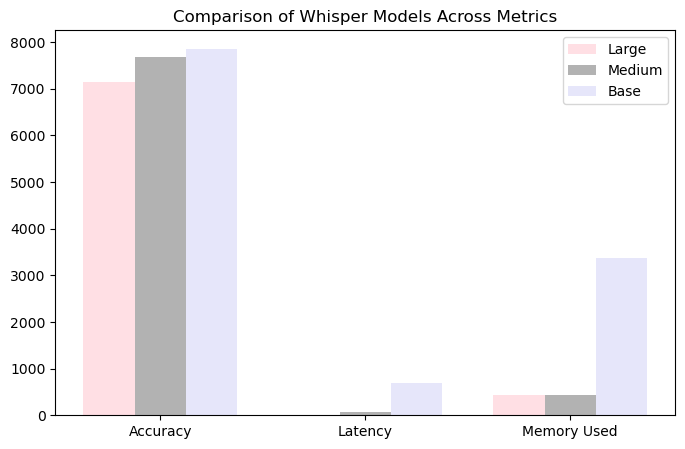

In [48]:
import matplotlib.pyplot as plt
import numpy as np

Accuracy_values = [accuracy_base*100, accuracy_medium*100, accuracy_large*100]
Latency_values = [latency1, latency2, latency]
MemoryUsed_values = [mem_base, mem_medium, mem_large]

models = ["Whisper Base", "Whisper Medium", "Whisper Large"]

metrics = ["Accuracy", "Latency", "Memory Used"]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(8, 5))

plt.bar(x - width, [Accuracy_values[0], Latency_values[0], MemoryUsed_values[0]], width, label='Large',color='pink',alpha=0.5)
plt.bar(x,         [Accuracy_values[1], Latency_values[1], MemoryUsed_values[1]], width, label='Medium',color='grey',alpha=0.6)
plt.bar(x + width, [Accuracy_values[2], Latency_values[2], MemoryUsed_values[2]], width, label='Base',color='Lavender')

plt.xticks(x, metrics)
plt.title("Comparison of Whisper Models Across Metrics")
plt.legend()
plt.show()
